# **Project name = FURNITURE SALES FORCAST**

# **Why are we doing it ?**

# **It will help buisness owners in terms of sales, profits, gain etc.**

# **To find out the popularity of a certain product & how its sales can impact the buisness.**

# **How it will help ?**

# **it will help to get insight into the past performance will reveal lot of components that will enable the buisness to identify the trends.**

# **Buisness Objective : To build forecast model to predict the furniture sales of a certain store.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Reading an excel file using Python
import xlrd

# import libraries
import pandas as pd
import numpy as np

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

#ARMA
from statsmodels.tsa.arima_model import ARIMA

#plots
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

#Ljung-box test for model goodness
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Sales_data = pd.read_csv("/content/drive/MyDrive/MINI PROJECT/DS3_C6_S4_TimeSeries_Sales_Data_Project.csv.csv",index_col="Order Date",parse_dates=True)
print(Sales_data)

            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2016-11-08       1  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-06-12       3  CA-2016-138688   6/16/2016    Second Class    DV-13045   
2015-10-11       4  US-2015-108966  10/18/2015  Standard Class    SO-20335   
2015-10-11       5  US-2015-108966  10/18/2015  Standard Class    SO-20335   
...            ...             ...         ...             ...         ...   
2014-01-21    9990  CA-2014-110422   1/23/2014    Second Class    TB-21400   
2017-02-26    9991  CA-2017-121258    3/3/2017  Standard Class    DB-13060   
2017-02-26    9992  CA-2017-121258    3/3/2017  Standard Class    DB-13060   
2017-02-26    9993  CA-2017-121258    3/3/2017  Standard Class    DB-13060   
2017-05-04    9994  CA-2017-119914    5/9/2017    Second Class  

In [4]:
Sales_data_new = Sales_data[Sales_data["Category"]== 'Furniture']      # only selecting furniture category
Sales_data_new

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [5]:
Sales_data_new = Sales_data_new.sort_values(by=['Order Date'])    # sorting the value by order date

In [6]:
Sales_df = Sales_data_new.groupby('Order Date')['Sales'].sum().reset_index()     

In [7]:
Sales_df = Sales_df.set_index('Order Date')
Sales_df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [8]:
Sales_df1 = Sales_df.resample('MS').mean()      #resampling the data in month starting
Sales_df1.shape

(48, 1)

In [9]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(Sales_data_new, x="Sub-Category")
fig.show()

# **in sub-category Furnishing type product count is high**

In [10]:
df = px.data.tips()
fig = px.histogram(Sales_data_new, x="Sales", nbins=30)
fig.show()

# **count is high in data whoes product value range between 10-500**

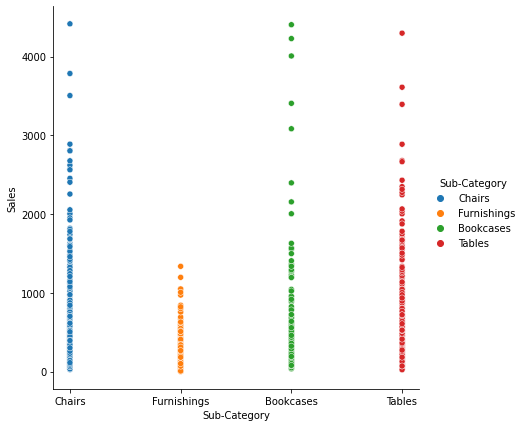

In [11]:
import seaborn as sns
sns.pairplot(Sales_data_new,x_vars='Sub-Category', y_vars='Sales',height=6, hue ='Sub-Category')

# **sub-category wise sales of products**
# **chairs having highest sales in sub-category followed by Tables**

In [12]:
df = px.data.tips()
fig = px.pie(Sales_data, values='Sales', names='Category')
fig.show()

# **Percentage wise distribution of categories w.r.t sales**

Text(0, 0.5, 'Count')

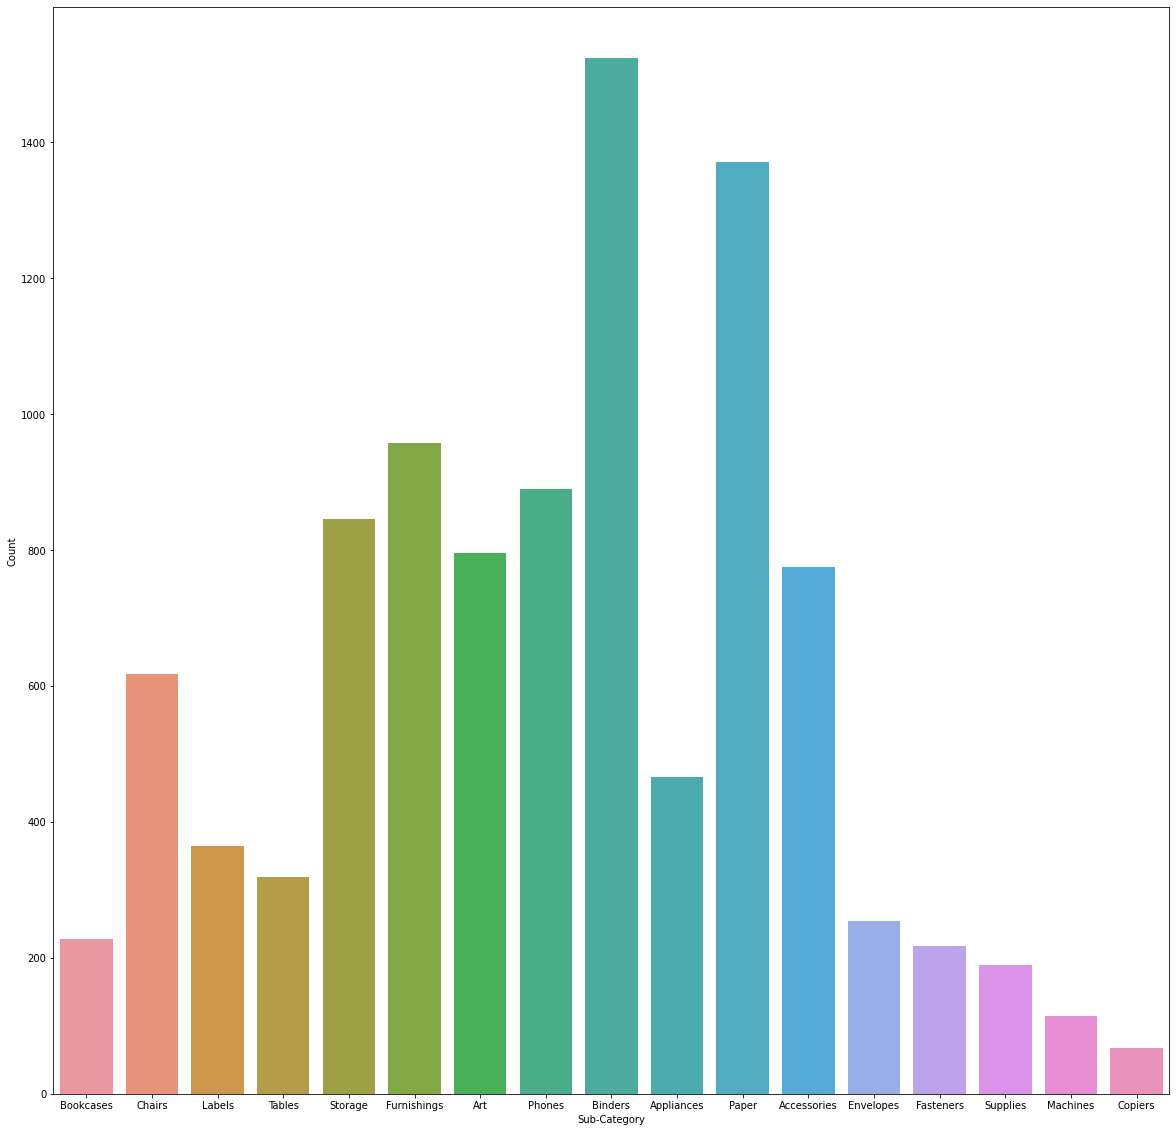

In [13]:
plt.figure(figsize=(20,20))
sns.countplot(x='Sub-Category', data=Sales_data)
plt.xlabel('Sub-Category')
plt.ylabel('Count')

# **in sub-category Binders are having high count followed by paper , furnishings & accessories**

In [14]:
#split the data into train and test 
ratio = 0.7
rows = int(ratio * len(Sales_df1))

train = Sales_df1[:rows]
test = Sales_df1[rows:]

print("Total={}, Train={}, Test={}".format(len(Sales_df1),len(train),len(test)))

Total=48, Train=33, Test=15


# **Perform data inspection on whether the data is ready for a time-series analysis. If not, then make the data be able to perform a time-series analysis.**

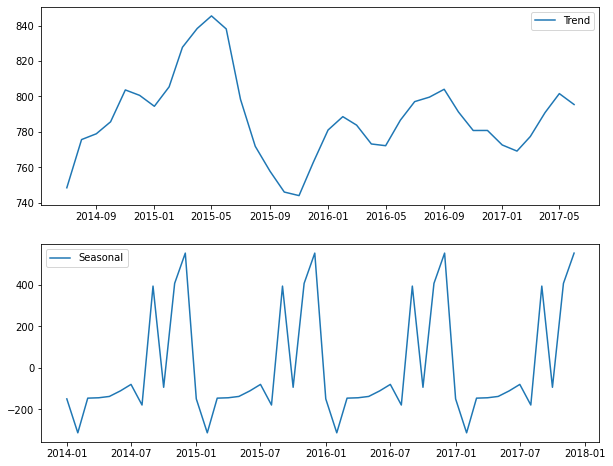

In [15]:
#decompose the data to check for the TS compoennts 

decomp = seasonal_decompose(Sales_df1.Sales)

d_seasonal = decomp.seasonal
d_trend = decomp.trend

#plot the trend and seasonal components
fig,ax=plt.subplots(2,1,figsize=(10,8))

plt.subplot(211)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(212)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

# **TREND AS WELL AS SEASONALITY PRESENT IN DATA**

In [16]:
def checkStationarity (Sales_df1):
  pvalue = adfuller(Sales_df1)[1]
  if pvalue < 0.05:
    ret = "Data is stationary. Proceed to model building"
  else:
    ret = "Data is not stationary. Make it statioanry"
  return(ret)

# check the data for stationarity
print("TRAIN :", checkStationarity(train.Sales))

TRAIN : Data is stationary. Proceed to model building


In [17]:
# check the data for stationarity
print("TEST :", checkStationarity(test.Sales))

TEST : Data is not stationary. Make it statioanry


Text(0.5, 1.0, 'Auto Correlation Fuction')

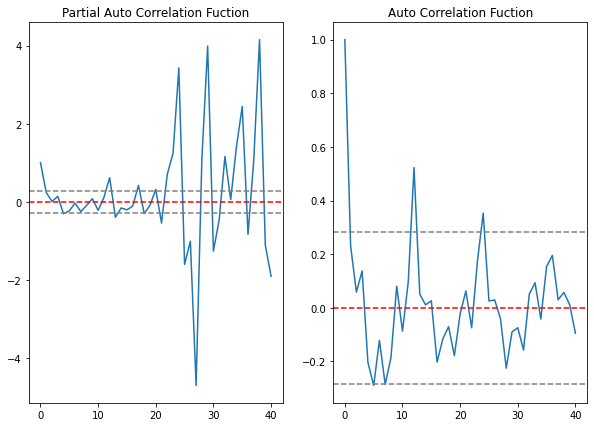

In [18]:
sales_acf = acf(Sales_df1.Sales)   
sales_pacf = pacf(Sales_df1.Sales)
N = len(Sales_df1.Sales)
SE = 1.96/np.sqrt(len(Sales_df1.Sales))

#plot the ACF/PACF
fig,ax = plt.subplots(figsize= (10,7))

plt.subplot(121)
plt.plot(sales_pacf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="gray")
plt.axhline(y=-SE,linestyle="--",color="gray")
plt.title("Partial Auto Correlation Fuction")

plt.subplot(122)
plt.plot(sales_acf)
plt.axhline(y=0, linestyle = "--",color = "red")
plt.axhline(y=SE,linestyle="--",color="gray")
plt.axhline(y=-SE,linestyle="--",color="gray")
plt.title("Auto Correlation Fuction")

In [19]:
p= np.arange(6)
q=np.arange(2)
print(p,q)

[0 1 2 3 4 5] [0 1]


# **ARMA MODEL**

In [20]:
l=[0,1,2,3,4,5]
l1 = [0,1]
d=0
P1 = []
Q1 = []
MSE1=[]
RMSE1 = []
list1 = []
for i in l:
  for j in l1:
    P1.append(i)
    Q1.append(j)

    m1 = ARIMA(train,order=(i,0,j)).fit()

    aic1,bic1 = np.round(m1.aic,2),np.round(m1.bic,2)
    print("Model 1:AIC={},BIC={}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    f1 = m1.predict(start=0,end=len(test)-1)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(test.Sales[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    print(df1)
    list1.append(df1)

    #calculate the MSE
    mse1 = mean_squared_error(df1.actual,df1.forecast)
    print("_______________________________________________________")
    print("ARMA Model . p={},q={}\n\tMSE = {}\n\tRMSE ={}".format(i,j,mse1,np.sqrt(mse1)))
    MSE1.append(mse1)
    rmse = np.sqrt(mse1)
    RMSE1.append(rmse)
    

Model 1:AIC=470.14,BIC=473.13
Good model
         actual    forecast       error
0    624.872474  753.365432 -128.492959
1   1271.345152  753.365432  517.979720
2   1410.719808  753.365432  657.354375
3    397.602133  753.365432 -355.763299
4    528.179800  753.365432 -225.185632
5    544.672240  753.365432 -208.693192
6    453.297905  753.365432 -300.067527
7    678.302328  753.365432  -75.063104
8    826.460291  753.365432   73.094859
9    562.524857  753.365432 -190.840575
10   857.881889  753.365432  104.516456
11  1209.508583  753.365432  456.143151
12   875.362728  753.365432  121.997296
13  1277.817759  753.365432  524.452326
14  1256.298672  753.365432  502.933240
_______________________________________________________
ARMA Model . p=0,q=0
	MSE = 122470.72078417
	RMSE =349.9581700491789
Model 1:AIC=471.08,BIC=475.57
Good model
         actual    forecast       error
0    624.872474  754.373600 -129.501126
1   1271.345152  706.550476  564.794676
2   1410.719808  693.457490  717.

In [21]:
# dataframe of all results
df_results_ARMA = pd.DataFrame({'Model No.': m1, 'p':P1, 'q':Q1, 'MSE': MSE1, 'RMSE': RMSE1})
df_results_ARMA

,Model No.,p,q,MSE,RMSE
0,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,0,0,122470.720784,349.958170
1,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,0,1,130969.449412,361.897015
2,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,1,0,129375.204525,359.687649
3,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,1,1,130690.854418,361.511901
4,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,2,0,127417.825826,356.956336
5,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,2,1,130417.515396,361.133653
6,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,3,0,123063.410652,350.803949
7,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,3,1,120702.825497,347.423122
8,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,4,0,121141.547225,348.053943
9,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,4,1,135582.025962,368.214647


In [22]:
ARMA_MODEL = df_results_ARMA[df_results_ARMA.RMSE == df_results_ARMA.RMSE.min()]

# **ARIMA model**

In [23]:
l=[0,1,2,3,4,5]
l1 = [0,1]
d=1
P2 = []
Q2 = []
MSE2=[]
RMSE2 = []
list1 = []
for i in l:
  for j in l1:
    P2.append(i)
    Q2.append(j)

    m2 = ARIMA(train,order=(i,0,j)).fit()

    aic1,bic1 = np.round(m2.aic,2),np.round(m2.bic,2)
    print("Model 1:AIC={},BIC={}".format(aic1,bic1))

    pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

    if pvalue < 0.05:
      print("Not good model")
    else:
      print("Good model")

    #forecast on the test data 
    f1 = m2.predict(start=0,end=len(test)-1)

    #store actual and predicted data in dataframe
    actual = [] ; pred = []

    for k in range(len(f1)):
      actual.append(test.Sales[k])
      pred.append(f1[k])

    df1 = pd.DataFrame({'actual':actual,'forecast':pred})
    df1['error'] = df1.actual-df1.forecast
    print(df1)
    list1.append(df1)

    #calculate the MSE
    mse2 = mean_squared_error(df1.actual,df1.forecast)
    print("_______________________________________________________")
    print("ARIMA Model . p={},q={}\n\tMSE = {}\n\tRMSE ={}".format(i,j,mse2,np.sqrt(mse2)))
    MSE2.append(mse2)
    rmse = np.sqrt(mse2)
    RMSE2.append(rmse)

  '''plot the actual and forecast
  df1.actual.plot(figsize=(10,8),legend=True)
  df1.forecast.plot(legend=True)
  plt.title("ARMA model")'''

Model 1:AIC=470.14,BIC=473.13
Good model
         actual    forecast       error
0    624.872474  753.365432 -128.492959
1   1271.345152  753.365432  517.979720
2   1410.719808  753.365432  657.354375
3    397.602133  753.365432 -355.763299
4    528.179800  753.365432 -225.185632
5    544.672240  753.365432 -208.693192
6    453.297905  753.365432 -300.067527
7    678.302328  753.365432  -75.063104
8    826.460291  753.365432   73.094859
9    562.524857  753.365432 -190.840575
10   857.881889  753.365432  104.516456
11  1209.508583  753.365432  456.143151
12   875.362728  753.365432  121.997296
13  1277.817759  753.365432  524.452326
14  1256.298672  753.365432  502.933240
_______________________________________________________
ARIMA Model . p=0,q=0
	MSE = 122470.72078417
	RMSE =349.9581700491789
Model 1:AIC=471.08,BIC=475.57
Good model
         actual    forecast       error
0    624.872474  754.373600 -129.501126
1   1271.345152  706.550476  564.794676
2   1410.719808  693.457490  717

In [24]:
# dataframe of all results
df_results_ARIMA = pd.DataFrame({'Model No.': m2, 'p':P2, 'q':Q2, 'MSE': MSE2, 'RMSE': RMSE2})
df_results_ARIMA

,Model No.,p,q,MSE,RMSE
0,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,0,0,122470.720784,349.958170
1,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,0,1,130969.449412,361.897015
2,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,1,0,129375.204525,359.687649
3,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,1,1,130690.854418,361.511901
4,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,2,0,127417.825826,356.956336
5,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,2,1,130417.515396,361.133653
6,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,3,0,123063.410652,350.803949
7,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,3,1,120702.825497,347.423122
8,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,4,0,121141.547225,348.053943
9,<statsmodels.tsa.arima_model.ARMAResultsWrappe...,4,1,135582.025962,368.214647


In [25]:
ARIMA_MODEL = df_results_ARIMA[df_results_ARIMA.RMSE == df_results_ARIMA.RMSE.min()]

# **SARIMA MODEL**

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

________________________________________________
SARIMA Model. p=0,q=0 
	MSE = 838128.2923110026 
	RMSE = 915.4934692891056
________________________________________________
SARIMA Model. p=0,q=1 
	MSE = 651586.4804740585 
	RMSE = 807.2090686272414
________________________________________________
SARIMA Model. p=1,q=0 
	MSE = 292054.71387453825 
	RMSE = 540.4208673566725
________________________________________________
SARIMA Model. p=1,q=1 
	MSE = 118197.77782712548 
	RMSE = 343.7990369781822
________________________________________________
SARIMA Model. p=2,q=0 
	MSE = 157511.15089325974 
	RMSE = 396.8767452160176
________________________________________________
SARIMA Model. p=2,q=1 
	MSE = 111575.53504226268 
	RMSE = 334.0292427950922
________________________________________________
SARIMA Model. p=3,q=0 
	MSE = 98339.66818039329 
	RMSE = 313.5915626741148
________________________________________________
SARIMA Model. p=3,q=1 
	MSE = 56461.58185000383 
	RMSE = 237.61645955195073
___

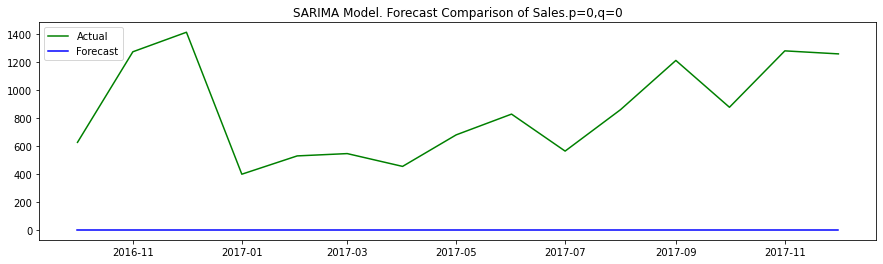

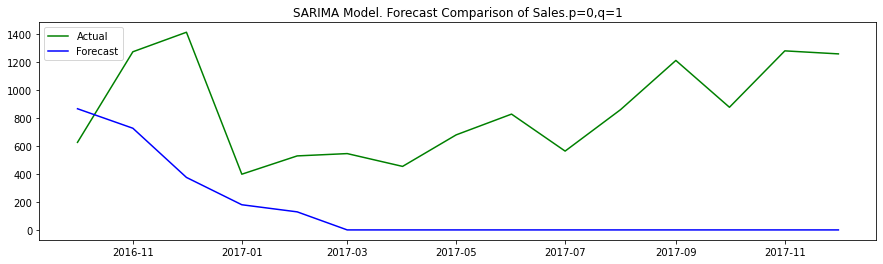

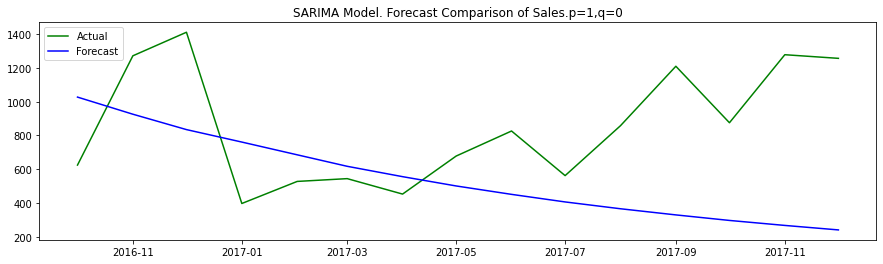

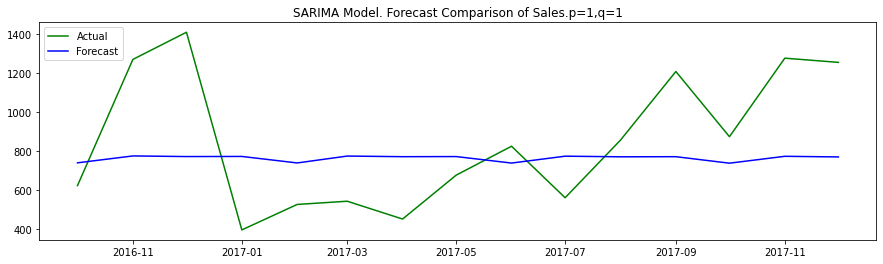

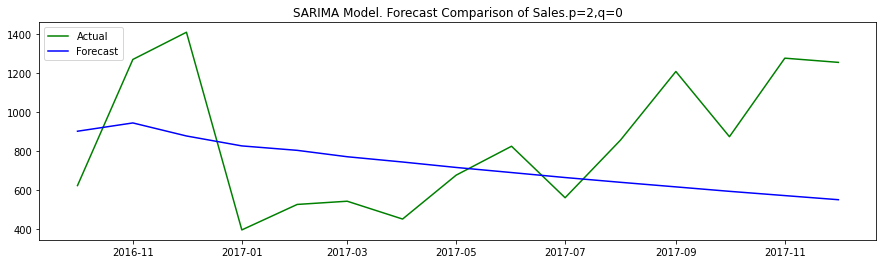

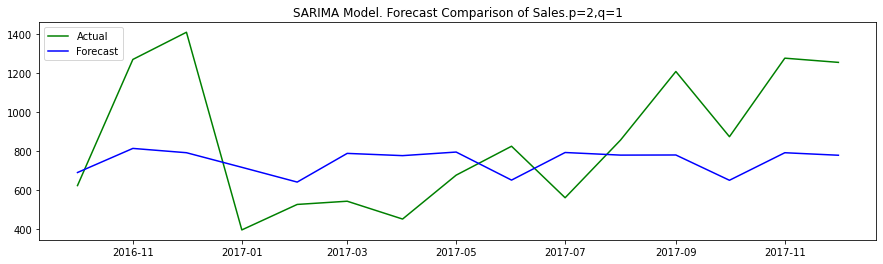

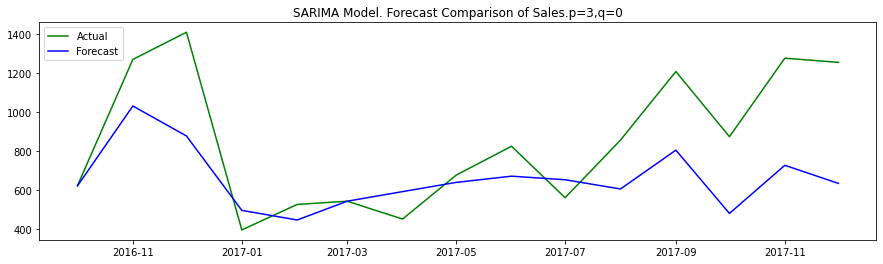

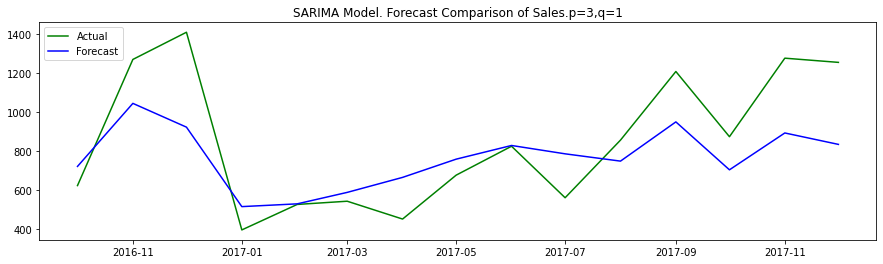

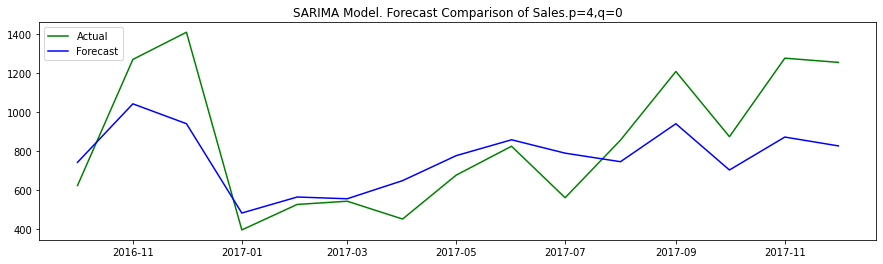

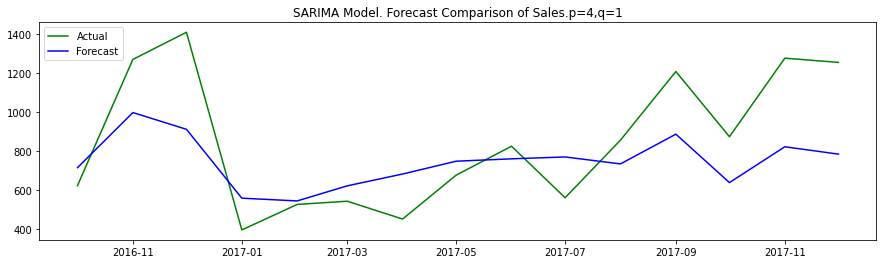

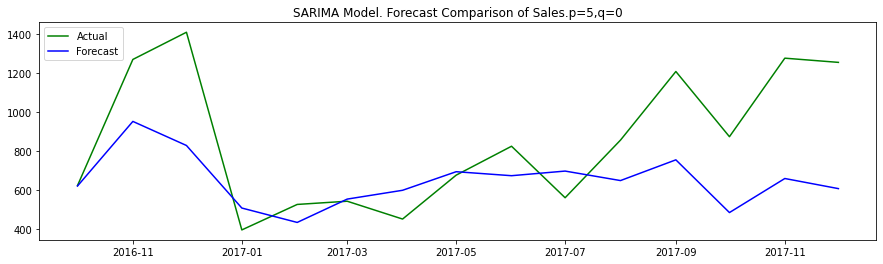

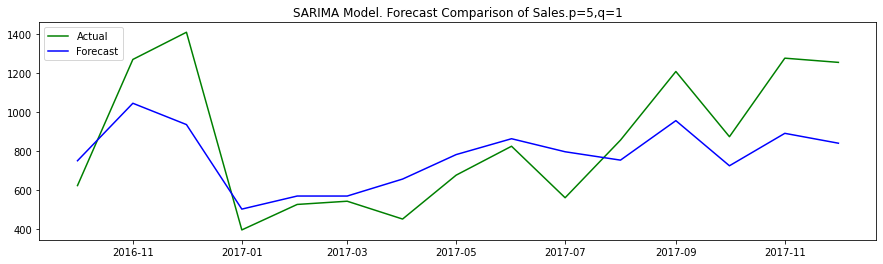

In [27]:
l=[0,1,2,3,4,5]
l1 = [0,1]

d=0
P3 = []
Q3 = []
MSE3=[]
RMSE3 =[]
for i in l:
  for j in l1:
    P3.append(i)
    Q3.append(j)

    sm1 = SARIMAX(train, order=(i,d,j),seasonal_order=(i,d,j,4)).fit()

    f1 = sm1.forecast(len(test))

    # plot the actual and forecast data (SARIMA)
    plt.figure(figsize=(15,4))
    plt.plot(test,'g',label='Actual')
    plt.plot(f1,'b',label='Forecast')
    plt.legend()
    plt.title("SARIMA Model. Forecast Comparison of Sales.p={},q={}".format(i,j))

    # Calcualate the MSE and RMSE
    mse = mean_squared_error(test, f1)
    rmse = np.sqrt(mse)
    MSE3.append(mse)
    RMSE3.append(rmse)
    print("________________________________________________")
    print("SARIMA Model. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse, np.sqrt(mse)))

In [28]:
# dataframe of all results
df_results_SARIMA = pd.DataFrame({'Model No.': sm1, 'p':P3, 'q':Q3, 'MSE': MSE3, 'RMSE': RMSE3})
df_results_SARIMA

,Model No.,p,q,MSE,RMSE
0,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,0,0,838128.292311,915.493469
1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,0,1,651586.480474,807.209069
2,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,1,0,292054.713875,540.420867
3,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,1,1,118197.777827,343.799037
4,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,2,0,157511.150893,396.876745
5,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,2,1,111575.535042,334.029243
6,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,3,0,98339.668180,313.591563
7,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,3,1,56461.581850,237.616460
8,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,4,0,57101.280048,238.958741
9,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,4,1,71322.395801,267.062532


In [29]:
SARIMA_MODEL = df_results_SARIMA[df_results_SARIMA.RMSE == df_results_SARIMA.RMSE.min()]

# **SARIMAX**

In [30]:
Sales_df_MAX = Sales_data_new.groupby('Order Date')['Sales','Profit', 'Discount', 'Quantity'].sum().reset_index() 

In [31]:
Sales_df_MAX = Sales_df_MAX.set_index('Order Date')

In [32]:
Sales_df_MAX1 = Sales_df_MAX.resample('MS').mean()      #resampling the data in month starting
Sales_df_MAX1.shape

(48, 4)

In [33]:
rows = int(0.7 * len(Sales_df_MAX1)); rows

train1 = Sales_df_MAX1.iloc[:rows]
test1 = Sales_df_MAX1.iloc[rows:]

In [34]:
exog_train = train1[['Profit', 'Discount', 'Quantity']]
exog_test  = test1[['Profit', 'Discount', 'Quantity']]

In [35]:
(len(exog_train), len(exog_test))

(33, 15)

________________________________________
SARIMAX Model . p=0,q=0 
	MSE = 33914.003371244486 
	RMSE = 184.15755040520193
________________________________________
SARIMAX Model . p=0,q=1 
	MSE = 34009.494475918575 
	RMSE = 184.41663286135167
________________________________________
SARIMAX Model . p=1,q=0 
	MSE = 33808.116804381214 
	RMSE = 183.86983658115653
________________________________________
SARIMAX Model . p=1,q=1 
	MSE = 35136.94481755126 
	RMSE = 187.44851244422097
________________________________________
SARIMAX Model . p=2,q=0 
	MSE = 34177.23569466068 
	RMSE = 184.87086221105986
________________________________________
SARIMAX Model . p=2,q=1 
	MSE = 34062.18737763205 
	RMSE = 184.55944131263524
________________________________________
SARIMAX Model . p=3,q=0 
	MSE = 34403.34368115554 
	RMSE = 185.48138365117813
________________________________________
SARIMAX Model . p=3,q=1 
	MSE = 34122.929255570874 
	RMSE = 184.72392713335995
________________________________________
SAR

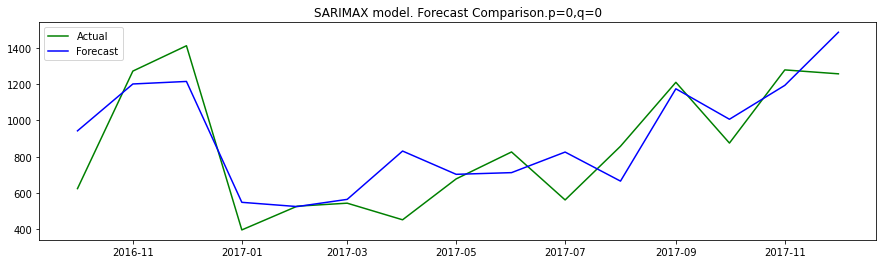

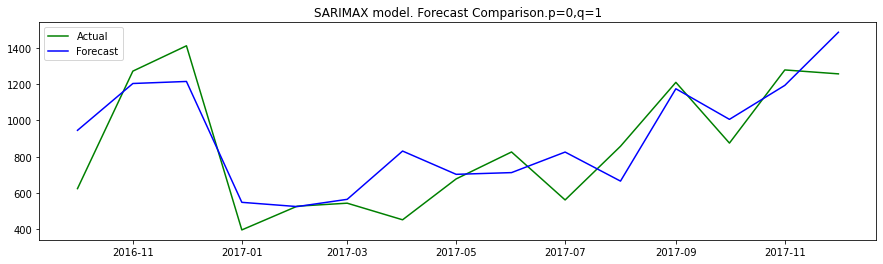

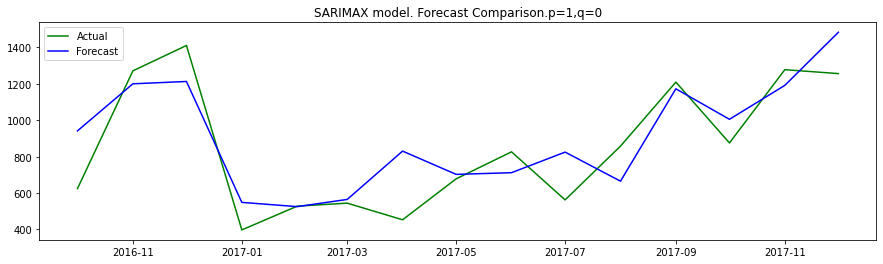

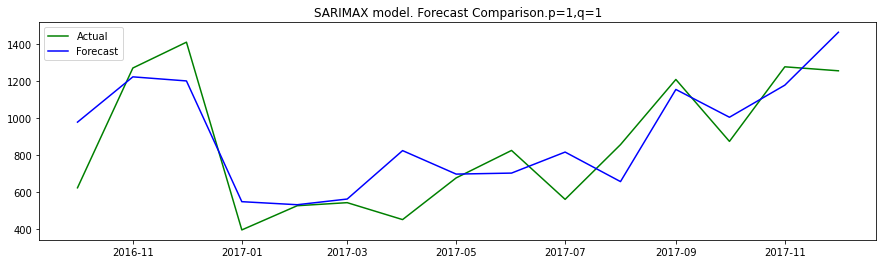

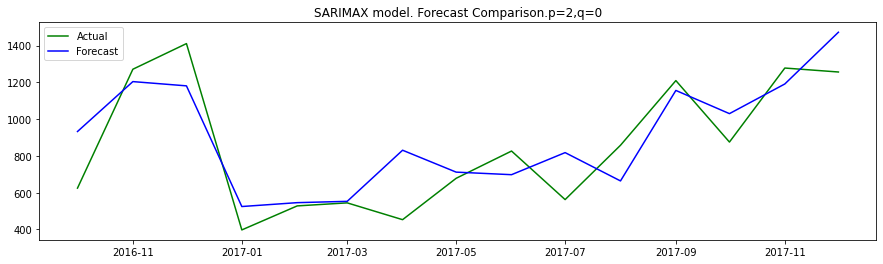

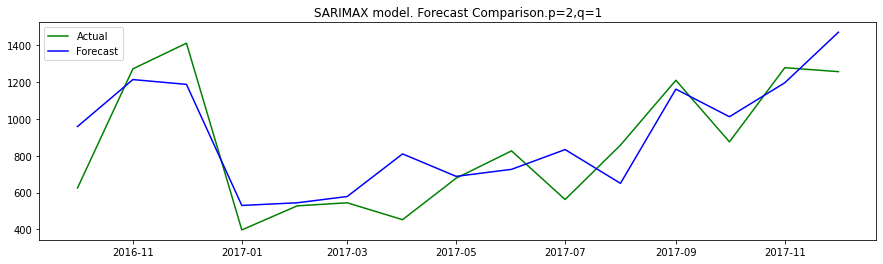

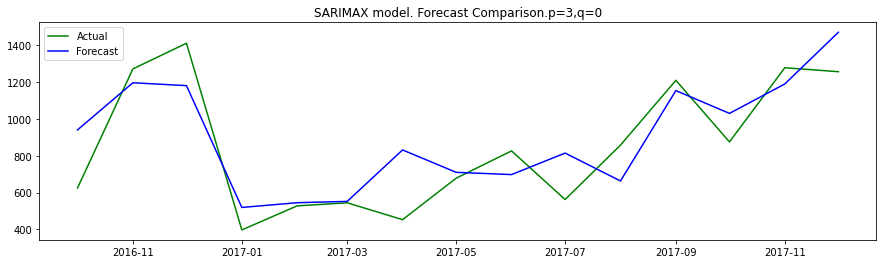

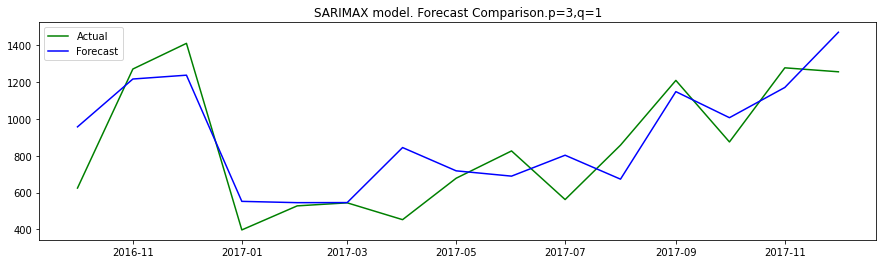

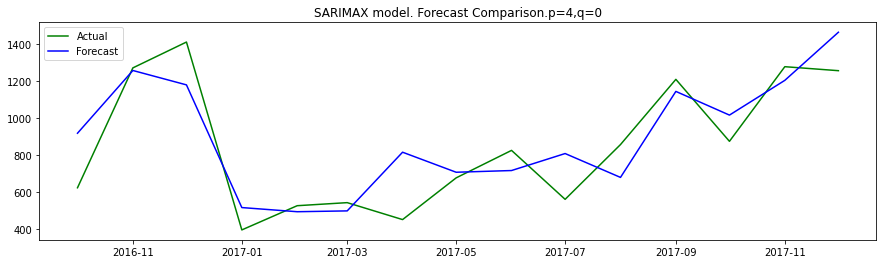

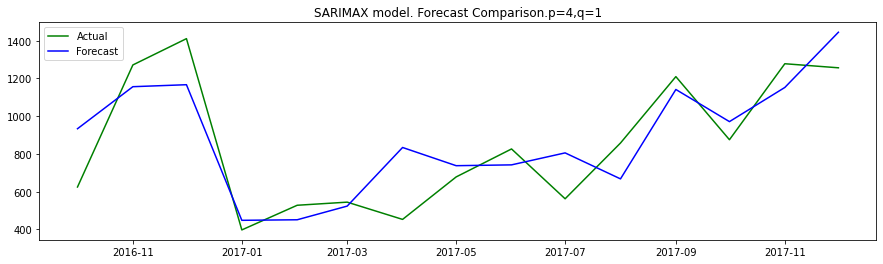

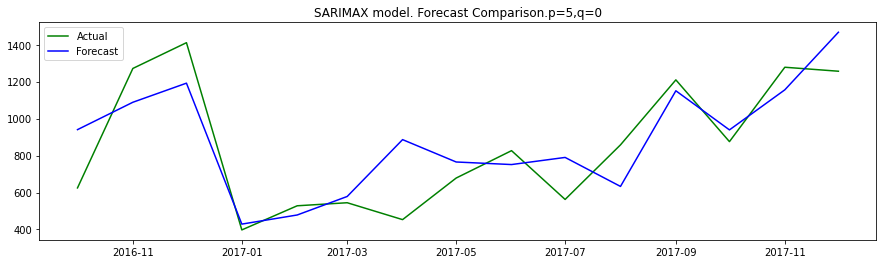

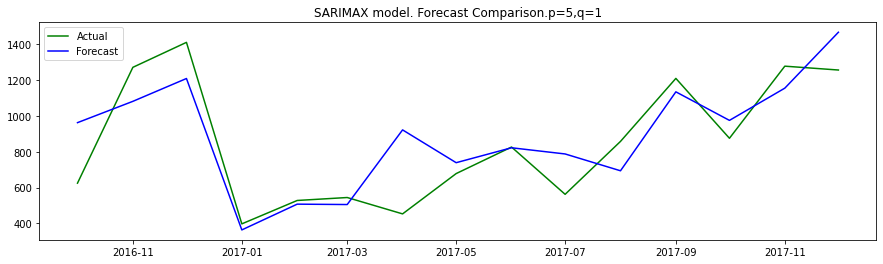

In [36]:
l=[0,1,2,3,4,5]
l1 = [0,1]
d=0
P4 = []
Q4 = []
MSE4=[]
RMSE4 = []
for i in l:
  for j in l1:
    P4.append(i)
    Q4.append(j)

    sm2 = SARIMAX(train1.Sales, order=(i,d,j),seasonal_order=(i,d,j,2), exog=exog_train.values).fit()

    f2 = sm2.forecast(len(test1), exog=exog_test.values)

    mse4 = mean_squared_error(test1.Sales, f2)
    print("________________________________________")
    print("SARIMAX Model . p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(i,j,mse4, np.sqrt(mse4)))

    # plot the actual and forecast data (SARIMAX)
    plt.figure(figsize=(15,4))
    plt.plot(test1.Sales,'g',label='Actual')
    plt.plot(f2,'b',label='Forecast')
    plt.legend()
    plt.title("SARIMAX model. Forecast Comparison.p={},q={}".format(i,j))

    MSE4.append(mse4)
    rmse = np.sqrt(mse4)
    RMSE4.append(rmse)

In [37]:
# dataframe of all results
df_results_SARIMAX = pd.DataFrame({'Model No.': sm2, 'p':P4, 'q':Q4, 'MSE': MSE4, 'RMSE': RMSE4})
df_results_SARIMAX

,Model No.,p,q,MSE,RMSE
0,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,0,0,33914.003371,184.157550
1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,0,1,34009.494476,184.416633
2,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,1,0,33808.116804,183.869837
3,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,1,1,35136.944818,187.448512
4,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,2,0,34177.235695,184.870862
5,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,2,1,34062.187378,184.559441
6,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,3,0,34403.343681,185.481384
7,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,3,1,34122.929256,184.723927
8,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,4,0,31155.935400,176.510440
9,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,4,1,32867.262374,181.293305


In [38]:
SARIMAX_MODEL = df_results_SARIMAX[df_results_SARIMAX.RMSE == df_results_SARIMAX.RMSE.min()]

# **Perform a comparison study of each model and decide the best one by looking at various evaluation parameters like MSE/RMSE**

In [39]:
RESULT = pd.DataFrame({'Models':['ARMA','ARIMA','SARIMA', 'SARIMAX'],
                    'RESULTS':[ARMA_MODEL,ARIMA_MODEL,SARIMA_MODEL,SARIMAX_MODEL]})
RESULT


,Models,RESULTS
0,ARMA,Mod...
1,ARIMA,Mod...
2,SARIMA,Mo...
3,SARIMAX,Mod...


In [46]:
print(ARMA_MODEL)
print(" ")
print(" ")
print(ARIMA_MODEL)
print(" ")
print(" ")
print(SARIMA_MODEL)
print(" ")
print(" ")
print(SARIMAX_MODEL)

                                           Model No.  p  q            MSE  \
7  <statsmodels.tsa.arima_model.ARMAResultsWrappe...  3  1  120702.825497   

         RMSE  
7  347.423122  
 
 
                                           Model No.  p  q            MSE  \
7  <statsmodels.tsa.arima_model.ARMAResultsWrappe...  3  1  120702.825497   

         RMSE  
7  347.423122  
 
 
                                            Model No.  p  q           MSE  \
11  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  5  1  55392.361507   

          RMSE  
11  235.355819  
 
 
                                           Model No.  p  q         MSE  \
8  <statsmodels.tsa.statespace.sarimax.SARIMAXRes...  4  0  31155.9354   

        RMSE  
8  176.51044  


# **Between comparision of all models SARIMAX models MSE & RMSE values are less so for the forcast comparision SARIMAX is better model than others**